In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import seaborn as sns
import math
import json

In [108]:
#Model Variables and Parameters
average_age=20
# Average ages in base year for underground and overhead distribution lines (in years)
age_shape=10
# We selected age shape and scale in a way that age_shape*age_scale=average_age
age_scale=2
# We selected age shape and scale in a way that age_shape*age_scale=average_age
length_shape=2
# We selected length shape and scale in a way that length_shape*length_age=average_length
length_scale=0.25
# We selected age shape and scale in a way that length_shape*age scale=average_length
average_length=0.5
# Average length for underground and overhead distribution lines (in miles)
segment_number= 625
# Numbers of line segments in the network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach segment's length is considered about 0.5 miles. So by dividing (91.5+121.7)/.5 we calculated this parameter.
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
overhead_baseyear=191
#Length of overhead lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514/255
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':40,'replcost':357000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':120,'over_under_raplcost':357000}
# the above two dictionaries shows related parameters for overhead and underground lines and the parameters are as follows:
#lifespan=Useful lifespan of overhead line and underground lines
#replcost=Cost associated with replacing a line with the same line type after it reaches its life span. 
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of line
# corridor_length= length of the corridor in feet needed for calculating environmental cost.
# over_under_raplcost= replacement cost associated with replacing an overhead line with an underground line.
###

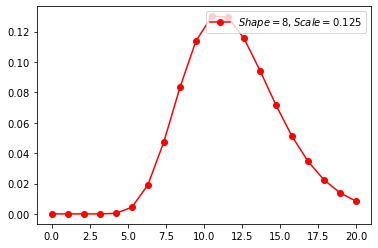

In [3]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segment age

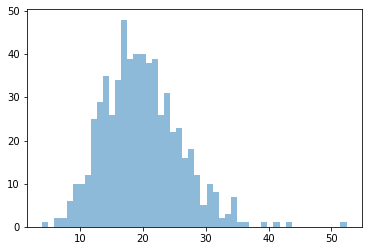

[18.09205558 19.13339548 17.044398   24.64042092 25.7234523  18.01303598
 21.74138813 20.05018909 17.91646196 17.44863525 25.88811555 24.8190732
 23.13997128 24.64595432 14.89602762 14.34395346 10.47762531 25.83413553
 17.56015754 17.50844874 11.01223019 25.55527379 13.17951804 23.45055037
 18.36672556 18.69913653 22.93634673 21.11182373 14.74801975 19.55451851
 17.76003628 21.22167288 19.29711992 18.09960771 24.02279627 26.88571531
 10.42968048 17.72133121 16.47097186 26.44906709 24.20183345 16.83535061
 18.46857374 24.98468733 16.10191959 26.75283269 27.0782287  20.15352661
 25.1795132  13.86570738 23.05778278 25.5682077  21.87452765 20.06052834
 15.15428752 16.68407176 21.79094108 17.09959415 16.07728845  9.75786453
 13.29748178 25.67092272 20.49447087 19.60781686 23.36183511 18.83060044
 18.5227409  18.39258536 27.33322767 21.76500756 18.75315779 17.96913205
 19.69754595 17.5979329  18.95831088 18.86819573 10.0808529  29.64875746
 34.15302526 28.17105069 36.03924839 30.90914727 20.

In [4]:
age=np.random.gamma(age_shape,age_scale,segment_number)
plt.hist(np.random.gamma(age_shape,age_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined segment's ages in the base year

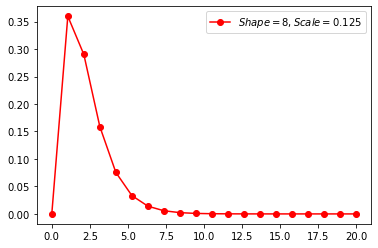

In [5]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segments length
#length_shape*length_scale=average_length=0.5

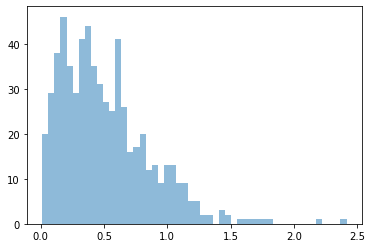

[0.73024539 0.15663339 0.56745087 0.31995747 0.7526811  0.14278218
 0.02988953 0.14729667 1.03340133 0.31738755 0.77858436 0.58103507
 0.33733639 0.5715459  0.37182397 0.14974896 0.11583406 1.41986382
 0.23910255 0.7508215  0.64148824 0.47638438 0.5615187  0.10910374
 0.60204885 0.40224805 0.11034556 0.26261713 0.41947363 0.27362113
 1.4488187  0.10753756 0.40796735 0.57605438 1.05665448 0.33500111
 0.54004196 0.03584994 0.34991605 0.39208469 0.59623424 0.10897615
 0.54533048 0.30263774 1.4759446  1.16962645 0.05670795 0.72861393
 0.36165863 0.53285033 1.04612821 0.55028811 0.16519258 0.12270609
 0.44999642 0.56107543 0.54441396 0.55420361 0.70735839 0.43638169
 0.33226037 0.27716804 0.22985689 0.35002527 0.79940479 0.73955045
 0.33463576 0.01067973 0.72004053 0.72433549 0.11712679 0.35337866
 0.38212384 0.12007326 0.31431764 0.05216272 0.45915972 0.35775231
 0.87558896 0.55637489 0.27371591 0.23133413 0.3250624  0.33854471
 0.45265466 0.144546   0.98804319 0.74091137 0.44079641 0.9576

In [6]:
length=np.random.gamma(length_shape,length_scale,segment_number)
plt.hist(np.random.gamma(length_shape,length_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [109]:
#Defining Line segment class with required attributes and methods and these methods are going to be modified based on requirements for each strategies in the simulations.
class Line_segment:
    ## The __init__ function as the constructor, which assigns random length, age and underground status for the base year to each line segment.
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.calculate_opex()]
        
    ###Lifecycle Infrastructure Costs:
    # Add one year to the age of line segment,compare it to the lifespan, starts from 1 when reaches to lifespan and append this age to age list. Also append underground status to its list.
    def update_age_and_underground_statusQuo(self):
        if self.underground[-1]==1:
            lifespan_current= int(underground_line['lifespan'])
        else:
            lifespan_current= int(overhead_line['lifespan'])
        age_current=self.age[-1]
        if age_current<(lifespan_current-1):
            age_current+=1
            self.age.append(age_current)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
            
    def update_age_and_underground_under_after_lifespan(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    
    #Add interest rate to the replacement cost and also cansider different replacementcost rate when underground=1        
    def add_replcost_intrest_rate(self):
        underground_current=self.underground[-1]
        underground_baseyear=self.underground[0]
        if underground_current==1:
            replcost_growth_rate_current=underground_line['replcost_growth_rate']
        else:
            replcost_growth_rate_current=overhead_line['replcost_growth_rate']
        if underground_current==underground_baseyear:        
            replcost_new=(self.replcost_rate[-1])+((replcost_growth_rate_current)*(self.replcost_rate[-1]))
            self.replcost_rate.append(replcost_new)
        else:
            replcost_new=underground_line['replcost']*((1+replcost_growth_rate_current)**(len(self.underground)-1))
            self.replcost_rate.append(replcost_new)
        return(self.replcost_rate)
    
    #Determine capital expenses which is replacement cost for each line segment based on the rate of replacement cost in that year and length of the circuit.
    def calculate_capex(self):
        if (self.age[-1])==1:
            length_current=self.length
            replcost_rate_current=self.replcost_rate[-1]
            replcost_new=(replcost_rate_current)*(length_current)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    
    #Determin operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def calculate_opex(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_percentage_replcost_current=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_current=overhead_line['om_percentage_replcost']
        length_current=self.length
        replcost_rate_current=self.replcost_rate[-1]
        opex=(om_percentage_replcost_current)*(length_current)*(replcost_rate_current)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    
    #Add interest rate to opex.
    def add_opex_interest_rate(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)

    #Determin the first retirement year
    def determine_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
 
    ###Environmental Costs:
    #Determin environmental restoration cost based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    def calculate_environmental_restoration(self):
        if self.underground[-1]==0:
            corridor_length=overhead_line['corridor_length']
        else:
            corridor_length=underground_line['corridor_length']
        return((self.length)*(corridor_length)*640/5280*easment_value)

    
    ###Safety and health Costs:
    #Return fatal cost which is one element of safety cost
    def calculate_non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    
    #Return non-fatal cost which is one element of safety cost
    def calculate_fatal_cost(self):
        return(fir*employees/100000*vsl)

In [110]:
#run simulation for calculating cost elemnts of statusQuo strategy and assign a data frame to them.
def run_cost_simulation_statusQuo_strategy(years_of_analysis):
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    print(df_line_segment_array)
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_statusQuo()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array[t]+line_segment_fatal_cost_array[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_statusQuo=pd.DataFrame([range(years_of_analysis), line_segment_underground_length_total_array,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array,line_segment_non_fatal_cost_array,line_segment_fatal_cost_array,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_statusQuo['year'] = df_cost_line_segment_statusQuo['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_statusQuo_strategy_cost=[]
    for index, row in df_cost_line_segment_statusQuo.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_statusQuo_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_statusQuo_strategy_cost)
    net_present_value_statusQuo=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    net_present_value_statusQuo.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    print(net_present_value_statusQuo)
    print(df_cost_line_segment_statusQuo)

In [111]:
run_cost_simulation_statusQuo_strategy(40)

       length  base year age  base year underground
0    0.225738      14.731749                    1.0
1    0.393963      15.801804                    1.0
2    0.230192      22.443022                    0.0
3    1.338145      12.747211                    1.0
4    0.730179      21.059207                    1.0
..        ...            ...                    ...
620  0.094513      22.820023                    0.0
621  0.446444      20.714079                    0.0
622  0.897063      17.769020                    0.0
623  0.465529      22.937441                    1.0
624  1.278134      19.272532                    0.0

[625 rows x 3 columns]
   Net present value of lifecycle infrastructure cost  \
0                                       1.293053e+07    

   Net present value of environmental cost  Net present value of safety cost  \
0                                      0.0                      1.357184e+06   

   Net present value of total statusQuo strategy cost  
0                   

In [128]:
#run simulation for calculating cost elemnts of undergrounding after lifespan strategy and assign a data frame to them.
def run_cost_simulation_under_after_lifespan_strategy(years_of_analysis):
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    print(df_line_segment_array)
    #underground_length_new=[]
    underground_total=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_under_after_lifespan()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
            
            
    #Generating underground length new array
    underground_length_total=[0 for t in range (years_of_analysis)]
    for i in range (len(line_segment_array)):
        first_retire=line_segment_array[i].determine_first_retire()
        length=line_segment_array[i].length
        if int(first_retire)>years_of_analysis-1:
            pass
        else:
            if line_segment_array[i].underground[0]==0:
                if 0<first_retire-(line_segment_array[i].age[-1])<1:
                    underground_length_total[int(first_retire)]+=length
                else:
                    underground_length_total[int(first_retire)]+=0
            if line_segment_array[i].underground[0]==1:
                underground_length_total[int(first_retire)]+=0
    print (underground_length_total)
      
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array[t]+line_segment_fatal_cost_array[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_statusQuo=pd.DataFrame([range(years_of_analysis), line_segment_underground_length_total_array,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array,line_segment_non_fatal_cost_array,line_segment_fatal_cost_array,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_statusQuo['year'] = df_cost_line_segment_statusQuo['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_statusQuo_strategy_cost=[]
    for index, row in df_cost_line_segment_statusQuo.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_statusQuo_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_statusQuo_strategy_cost)
    net_present_value_statusQuo=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    net_present_value_statusQuo.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    print(net_present_value_statusQuo)
    print(df_cost_line_segment_statusQuo)

In [129]:
run_cost_simulation_under_after_lifespan_strategy(40)

       length  base year age  base year underground
0    0.225738      14.731749                    1.0
1    0.393963      15.801804                    1.0
2    0.230192      22.443022                    0.0
3    1.338145      12.747211                    1.0
4    0.730179      21.059207                    1.0
..        ...            ...                    ...
620  0.094513      22.820023                    0.0
621  0.446444      20.714079                    0.0
622  0.897063      17.769020                    0.0
623  0.465529      22.937441                    1.0
624  1.278134      19.272532                    0.0

[625 rows x 3 columns]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
   Net present value of lifecycle infrastructure cost  \
0                                       1.384298e+07    

   Net present value of environmental cost  Net present value of safety cost  \
0                                   

In [107]:
#Defining Line segment class with a new approach: the class just covers the StatusQuo strategy methods and these methods are going to be changed based on requirements for other strategies in the simulations.
class Line_segment_statusQuo:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.opex_calculation()]
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[0]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[0]
        if underground==1:
            #lifespan_x= int(underground_line['lifespan'])
            #replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            #lifespan_x= int(overhead_line['lifespan'])
            #replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
        self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    def opex_calculation(self):
        underground=self.underground[0]
        if underground==1:
            om_percentage_replcost=underground_line['om_percentage_replcost']
            #om_growth_rate=underground_line['om_growth_rate']
        else:
            om_percentage_replcost=overhead_line['om_percentage_replcost']
            #om_growth_rate=overhead_line['om_growth_rate']
        length=self.length
        replcost_rate=self.replcost_rate[0]
        opex=(om_percentage_replcost)*(length)*(replcost_rate)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    def opex_add_interest_rate(self):
        underground=self.underground[0]
        if underground==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)
    #Determining operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def get_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
    #Determining the first retirement year
 
    ###Environmental Costs:
    def environmental_restoration_calculation(self):
        if self.underground[0]==0:
            corridor_length=overhead_line['corridor_length']
        else:
            corridor_length=underground_line['corridor_length']
        return((self.length)*(corridor_length)*640/5280*easment_value)
    #Determining environmental restoration costs based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    
    ###Safety and health Costs:
    def non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    def fatal_cost(self):
        return(fir*employees/100000*vsl)

In [407]:
###generating important cost results for statusQuo strategy in a data frame
circuit_list=[]
circuit_list_length=[]
circuit_list_age=[]
circuit_list_underground=[]
capex=[0 for t in range (40)]
opex=[0 for t in range (40)]
underground_length_new=[0 for t in range (40)]
underground_length_total=[0 for t in range (40)]
environmental_restoration_cost=[0 for t in range (40)]
underground_rate=[]
random.seed(10)
for i in range (segment_number):
    circuit=Line_segment_statusQuo(age_shape, age_scale, length_shape, length_scale, 0.66)
    circuit_list.append(circuit)
    circuit_list_length.append(circuit.length)
    circuit_list_age.append(circuit.age[0])
    circuit_list_underground.append(circuit.underground[0])
    underground_length_total[0]+=circuit_list[i].underground[0]
df_circuit_list=pd.DataFrame([circuit_list_lengh, circuit_list_age,circuit_list_underground]).transpose()
df_circuit_list.columns=['length','base year age','base year underground']
for t in range (40):
    for i in range (len(circuit_list)):
        circuit_list[i].add_age()
        circuit_list[i].add_replcost_intrest_rate()
        circuit_list[i].capex_calculation()
        circuit_list[i].opex_calculation()
        circuit_list[i].opex_add_interest_rate()
        circuit_list[i].environmental_restoration_calculation()
        capex[t]+=circuit_list[i].capex[t]
        opex[t]+=circuit_list[i].opex[t]
#print(underground_length_total)
#Determining future total new underground line mileage
#print(capex)
#print(opex)
Lifecycle_infrastructure_cost=[0 for t in range (40)]
for t in range (40):
    Lifecycle_infrastructure_cost[t]=Lifecycle_infrastructure_cost[t]+capex[t]+opex[t]
#print(Lifecycle_infrastructure_cost)
#print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines
#environmental_restoration_cost=[circuit_list[0].environmental_restoration_calculation() for t in range (40)]
environmental_restoration_cost=[0 for t in range (40)]
#print(environmental_restoration_cost)
non_fatal_cost=[circuit_list[0].non_fatal_cost() for t in range (40)]
fatal_cost=[circuit_list[0].fatal_cost() for t in range (40)]
total_safety_cost=[0 for t in range (40)]
for t in range (40):
    total_safety_cost[t]=non_fatal_cost[t]+fatal_cost[t]
#print(non_fatal_cost)
#print(fatal_cost)
#print(total_safety_cost)
total_undergrounding_cost=[0 for t in range (40)]
for t in range (40):
    total_undergrounding_cost[t]+=Lifecycle_infrastructure_cost[t]+environmental_restoration_cost[t]+total_safety_cost[t]
#print(total_undergrounding_cost)
df_cost_statusQuo=pd.DataFrame([range(40), underground_length_total,capex,opex,Lifecycle_infrastructure_cost,environmental_restoration_cost,non_fatal_cost,fatal_cost,total_safety_cost,total_undergrounding_cost]).transpose()
df_cost_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
df_cost_statusQuo['year'] = df_cost_statusQuo['year'].astype(int)

In [408]:
df_circuit_list

,length,base year age,base year underground
0,0.183757,10.733337,0.0
1,0.742397,15.656005,0.0
2,0.435247,15.942214,0.0
3,0.572296,38.524693,0.0
4,0.235609,17.145205,1.0
...,...,...,...
620,1.086840,17.888526,1.0
621,0.705729,20.771879,1.0
622,0.327809,20.077430,1.0
623,1.176782,13.212369,0.0


In [409]:
df_cost_statusQuo.set_index('year')

,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
year,,,,,,,,,
0,204.0,0.000000e+00,2.859283e+05,2.859283e+05,0.0,91611.240988,34556.823529,126168.064518,4.120964e+05
1,0.0,0.000000e+00,3.002247e+05,3.002247e+05,0.0,91611.240988,34556.823529,126168.064518,4.263928e+05
2,0.0,0.000000e+00,3.152359e+05,3.152359e+05,0.0,91611.240988,34556.823529,126168.064518,4.414040e+05
3,0.0,0.000000e+00,3.309977e+05,3.309977e+05,0.0,91611.240988,34556.823529,126168.064518,4.571658e+05
4,0.0,0.000000e+00,3.475476e+05,3.475476e+05,0.0,91611.240988,34556.823529,126168.064518,4.737157e+05
5,0.0,0.000000e+00,3.649250e+05,3.649250e+05,0.0,91611.240988,34556.823529,126168.064518,4.910931e+05
6,0.0,0.000000e+00,3.831713e+05,3.831713e+05,0.0,91611.240988,34556.823529,126168.064518,5.093393e+05
7,0.0,3.586670e+05,4.023298e+05,7.609968e+05,0.0,91611.240988,34556.823529,126168.064518,8.871649e+05
8,0.0,3.128673e+05,4.224463e+05,7.353136e+05,0.0,91611.240988,34556.823529,126168.064518,8.614817e+05


In [410]:
df_cost_statusQuo['Lifecycle infrastructure cost'].sum()

77333638.07849252

In [411]:
df_cost_statusQuo['environmental restoration cost'].sum()

0.0

In [412]:
df_cost_statusQuo['total safety cost'].sum()

5046722.580705882

In [413]:
df_cost_statusQuo['total undergrounding cost'].sum()

82380360.6591984

In [414]:
#df_cost_statusQuo[['capex','opex']].set_index('year').T.plot(kind='bar',stacked=True)

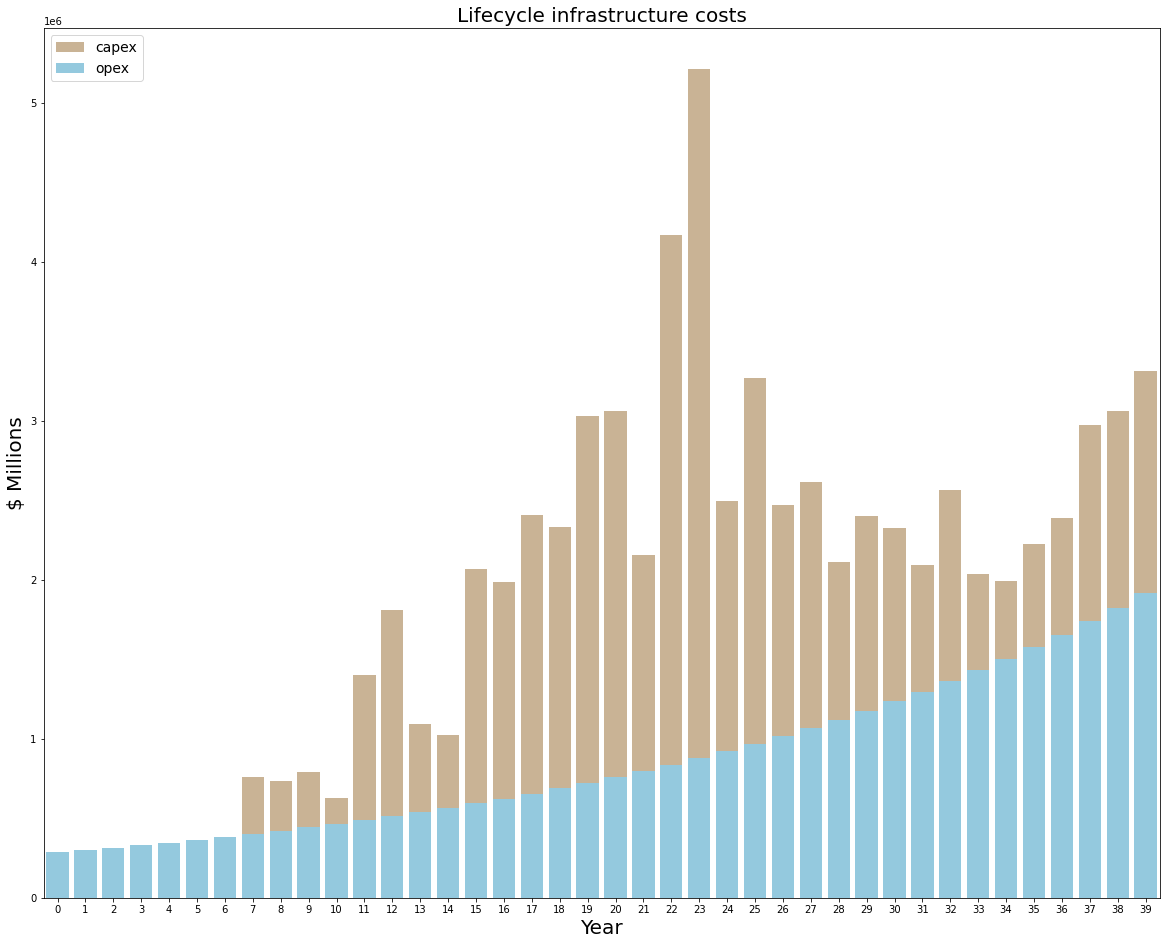

In [415]:
s_capex = sns.barplot(x='year', y='Lifecycle infrastructure cost', data = df_cost_statusQuo, color = 'tan', label="capex")
s_opex = sns.barplot(x ='year', y ='opex', data = df_cost_statusQuo, color = 'skyblue', label='opex')
plt.ylabel('$ Millions', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Lifecycle infrastructure costs', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)

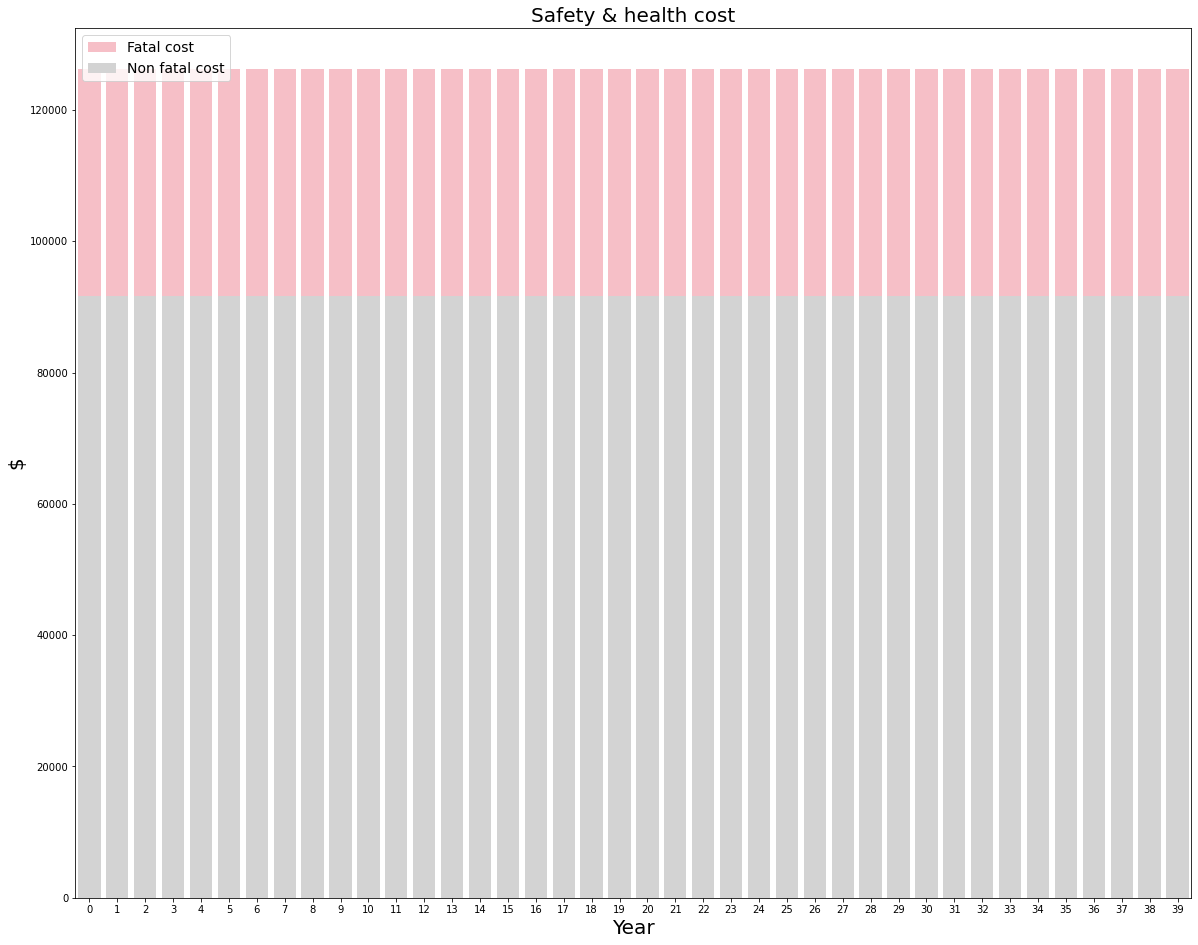

In [416]:
s_fatal_cost = sns.barplot(x='year', y='total safety cost', data = df_cost_statusQuo, color = 'lightpink', label="Fatal cost")
s_non_fatal_cost = sns.barplot(x ='year', y ='non fatal cost', data = df_cost_statusQuo, color = 'lightgray', label='Non fatal cost')
plt.ylabel('$', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Safety & health cost', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)

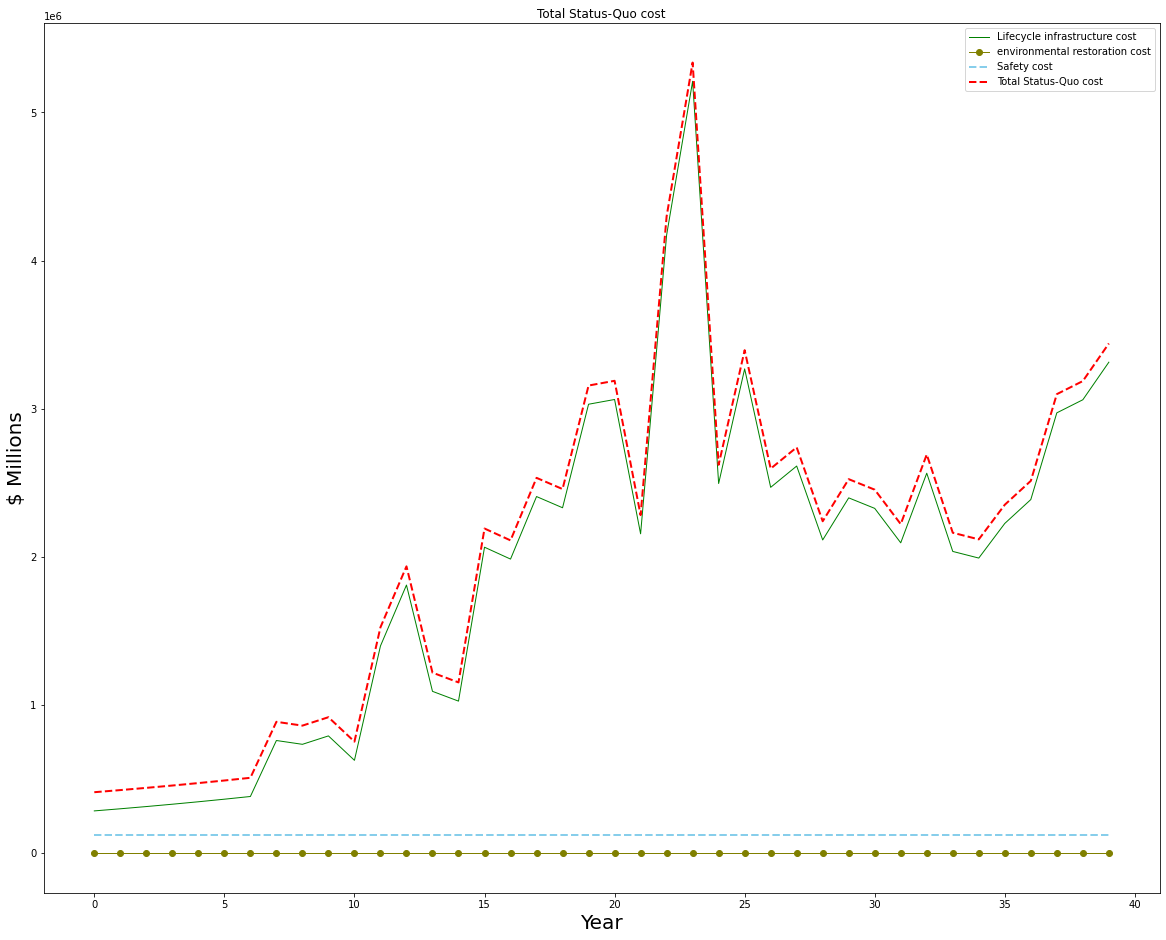

In [417]:
# multiple line plots
plt.plot( 'year', 'Lifecycle infrastructure cost', data=df_cost_statusQuo, marker='', markerfacecolor='green', markersize=4, color='green', linewidth=1)
plt.plot( 'year', 'environmental restoration cost', data=df_cost_statusQuo, marker='o', color='olive', linewidth=1)
plt.plot( 'year', 'total safety cost', data=df_cost_statusQuo, marker='', color='skyblue', linewidth=2, linestyle='dashed', label="Safety cost")
plt.plot( 'year', 'total undergrounding cost', data=df_cost_statusQuo, marker='', color='red', linewidth=2, linestyle='dashed', label="Total Status-Quo cost")
plt.ylabel('$ Millions', fontsize=20)
plt.xlabel('Year', fontsize=20)
#plt.xticks(x, df_cost_statusQuo['year'])
plt.title('Total Status-Quo cost', loc='center')
# show legend
plt.legend()

# show graph
plt.show()

In [426]:
###generating important cost results
circuit_list_new=[]
circuit_list_length_new=[]
circuit_list_age_new=[]
circuit_list_underground_new=[]
capex=[0 for t in range (40)]
opex=[0 for t in range (40)]
underground_length_new=[0 for t in range (40)]
underground_length_total=[0 for t in range (40)]
environmental_restoration_cost=[0 for t in range (40)]
underground_rate=[]
random.seed(10)
for i in range(segment_number):
    circuit=Line_segment_under_after_lifespan(age_shape, age_scale, length_shape, length_scale, 0.66)
    circuit_list_new.append(circuit)
    underground_length_total[0]+=circuit_list_new[i].underground[0]
    circuit_list_length_new.append(circuit.length)
    circuit_list_age_new.append(circuit.age[0])
    circuit_list_underground_new.append(circuit.underground[0])
df_circuit_list_under=pd.DataFrame([circuit_list_length_new, circuit_list_age_new,circuit_list_underground_new]).transpose()
df_circuit_list_under.columns=['length','base year age','base year underground']
for t in range (40):
    for i in range (len(circuit_list)):
        circuit_list_new[i].add_age()
        circuit_list_new[i].add_replcost_intrest_rate()
        circuit_list_new[i].capex_calculation()
        circuit_list_new[i].opex_calculation()
        circuit_list_new[i].opex_add_interest_rate()
        circuit_list_new[i].underground_length_new_array()
        underground_length_total[t]+=circuit_list_new[i].underground_length_new[t]
        circuit_list_new[i].environmental_restoration_calculation()
        capex[t]+=circuit_list_new[i].capex[t]
        opex[t]+=circuit_list_new[i].opex[t]
        underground_length_new[t]+=circuit_list_new[i].underground_length_new[t]
        environmental_restoration_cost[t]+=circuit_list_new[i].environmental_restoration[t]
    underground_length_total[t]+=underground_length_total[t-1]
    if underground_length_total[t-1]==0:
        underground_rate.append(1)
    else:
        underground_rate.append(underground_length_total[t]/underground_length_total[t-1])
#print(underground_length_new)
#print(underground_length_total)
#Determining future total new underground line mileage
#print(underground_rate)
#Determining rate change in underground, needed to calculate safety and health costs
#print(capex)
#print(opex)
Lifecycle_infrastructure_cost=[0 for t in range (40)]
for t in range (40):
    Lifecycle_infrastructure_cost[t]=Lifecycle_infrastructure_cost[t]+capex[t]+opex[t]
#print(Lifecycle_infrastructure_cost)
#print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines
non_fatal_cost=[0 for t in range (40)]
fatal_cost=[0 for t in range (40)]
total_safety_cost=[0 for t in range (40)]
for t in range (40):
    non_fatal_cost[t]+=underground_rate[t]*circuit_list_new[0].non_fatal_cost()
    fatal_cost[t]+=underground_rate[t]*circuit_list_new[0].fatal_cost()
    total_safety_cost[t]=non_fatal_cost[t]+fatal_cost[t]
#print(non_fatal_cost)
#print(fatal_cost)
#print(total_safety_cost)
total_undergrounding_cost=[0 for t in range (40)]
for t in range (40):
    total_undergrounding_cost[t]+=Lifecycle_infrastructure_cost[t]+environmental_restoration_cost[t]+total_safety_cost[t]
#print(total_undergrounding_cost)
df_cost_undergrounding=pd.DataFrame([range(40),underground_length_new, underground_length_total,capex,opex,Lifecycle_infrastructure_cost,environmental_restoration_cost,non_fatal_cost,fatal_cost,total_safety_cost,total_undergrounding_cost]).transpose()
df_cost_undergrounding.columns=['year','new underground length','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
df_cost_undergrounding['year'] =df_cost_undergrounding['year'].astype(int)

In [35]:
#Defining Line segment class for undergrounding after lifespan strategy with a new dynamic approach
class Line_segment_undergrounding_after_lifespan:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        #self.replcost_rate=self.set_replcost_rate_array
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        #self.opex=[0]
        self.opex=[self.opex_calculation()]
        self.underground_length_new=[0]
        #if self.underground[0]==1:
            #self.underground_length_new=[self.length]
        #else:
            #self.underground_length_new=[0]
        self.environmental_restoration=[0]
        self.underground_total=[0]
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
            replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            lifespan_x= int(overhead_line['lifespan'])
            replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        if (self.age[-1])==1:
            replcost_x_new=underground_line['replcost']*((1+replcost_growth_rate_x)**(len(self.age)-1))
            self.replcost_rate.append(replcost_x_new)
        else:
            replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
            self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    #def opex_calculation(self):
        #underground=self.underground[-1]
        #if underground==1:
            #om_percentage_replcost=underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost=overhead_line['om_percentage_replcost']
        #length=self.length
        #replcost_rate=self.replcost_rate[-1]
        #opex_new=(om_percentage_replcost)*(length)*(replcost_rate)
        #self.opex.append(opex_new)
        #return(self.opex)
    #Determining operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def opex_calculation(self):
        underground=self.underground[0]
        if underground==1:
            om_percentage_replcost=underground_line['om_percentage_replcost']
            #om_growth_rate=underground_line['om_growth_rate']
        else:
            om_percentage_replcost=overhead_line['om_percentage_replcost']
            #om_growth_rate=overhead_line['om_growth_rate']
        length=self.length
        replcost_rate=self.replcost_rate[0]
        opex=(om_percentage_replcost)*(length)*(replcost_rate)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    def opex_add_interest_rate(self):
        underground=self.underground[0]
        if underground==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)
    def get_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
    #Determining the first retirement year Under the undergrounding alternative
    def underground_length_new_array(self):
        first_retire=self.get_first_retire()
        length=self.length
        if self.underground[0]==0:
            if 0<first_retire-(self.age[-1])<1:
                self.underground_length_new.append(length)
            else:
                self.underground_length_new.append(0)
        if self.underground[0]==1:
            self.underground_length_new.append(0)
        return(self.underground_length_new)
    #Determining future annual underground line mileage
    def underground_length_total_array(self):
        first_retire=self.get_first_retire()
        length=self.length
        if self.underground[0]==0:
            if 0<first_retire-(self.age[-1])<1:
                self.underground_length_new.append(length)
            else:
                self.underground_length_new.append(0)
        if self.underground[0]==1:
            self.underground_length_new.append(0)
        return(self.underground_length_new)
    #Determining future annual new underground line mileage
      
    
    ###Environmental Costs:
    def environmental_restoration_calculation(self):
        #if self.underground[0]==0:
            #corridor_length=overhead_line['corridor_length']
        #else:
            #corridor_length=underground_line['corridor_length']
        self.environmental_restoration.append(+(self.underground_length_new[-1])*(underground_line['corridor_length']-overhead_line['corridor_length'])*640/5280*easment_value)
        return(self.environmental_restoration)
    #Determining environmental restoration costs based on the length of new underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    
    ###Safety and health Costs:
    def non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    def fatal_cost(self):
        return(fir*employees/100000*vsl)
        

In [36]:
###generating important cost results
circuit_list_new=[]
capex=[0 for t in range (40)]
opex=[0 for t in range (40)]
underground_length_new=[0 for t in range (40)]
underground_length_total=[0 for t in range (40)]
environmental_restoration_cost=[0 for t in range (40)]
underground_rate=[]
for i in range (segment_number):
    circuit=Line_segment_undergrounding_after_lifespan(age_shape, age_scale, length_shape, length_scale, 0.66)
    circuit_list_new.append(circuit)
    underground_length_total[0]+=circuit_list_new[i].underground[0]
#print(circuit_list)
for t in range (40):
    for i in range (len(circuit_list)):
        circuit_list_new[i].add_age()
        circuit_list_new[i].add_replcost_intrest_rate()
        circuit_list_new[i].capex_calculation()
        circuit_list_new[i].opex_calculation()
        circuit_list_new[i].opex_add_interest_rate()
        circuit_list_new[i].underground_length_new_array()
        underground_length_total[t]+=circuit_list_new[i].underground_length_new[t]
        circuit_list_new[i].environmental_restoration_calculation()
        capex[t]+=circuit_list_new[i].capex[t]
        opex[t]+=circuit_list_new[i].opex[t]
        underground_length_new[t]+=circuit_list_new[i].underground_length_new[t]
        environmental_restoration_cost[t]+=circuit_list_new[i].environmental_restoration[t]
    underground_length_total[t]+=underground_length_total[t-1]
    if underground_length_total[t-1]==0:
        underground_rate.append(1)
    else:
        underground_rate.append(underground_length_total[t]/underground_length_total[t-1])
#print(underground_length_new)
#print(underground_length_total)
#Determining future total new underground line mileage
#print(underground_rate)
#Determining rate change in underground, needed to calculate safety and health costs
#print(capex)
#print(opex)
Lifecycle_infrastructure_cost=[0 for t in range (40)]
for t in range (40):
    Lifecycle_infrastructure_cost[t]=Lifecycle_infrastructure_cost[t]+capex[t]+opex[t]
#print(Lifecycle_infrastructure_cost)
#print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines
non_fatal_cost=[0 for t in range (40)]
fatal_cost=[0 for t in range (40)]
total_safety_cost=[0 for t in range (40)]
for t in range (40):
    non_fatal_cost[t]+=underground_rate[t]*circuit_list_new[0].non_fatal_cost()
    fatal_cost[t]+=underground_rate[t]*circuit_list_new[0].fatal_cost()
    total_safety_cost[t]=non_fatal_cost[t]+fatal_cost[t]
#print(non_fatal_cost)
#print(fatal_cost)
#print(total_safety_cost)
total_undergrounding_cost=[0 for t in range (40)]
for t in range (40):
    total_undergrounding_cost[t]+=Lifecycle_infrastructure_cost[t]+environmental_restoration_cost[t]+total_safety_cost[t]
#print(total_undergrounding_cost)
df_cost_undergrounding=pd.DataFrame([range(40),underground_length_new, underground_length_total,capex,opex,Lifecycle_infrastructure_cost,environmental_restoration_cost,non_fatal_cost,fatal_cost,total_safety_cost,total_undergrounding_cost]).transpose()
df_cost_undergrounding.columns=['year','new underground length','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
df_cost_undergrounding['year'] =df_cost_undergrounding['year'].astype(int)

NameError: name 'circuit_list' is not defined

In [427]:
df_circuit_list_under

,length,base year age,base year underground
0,0.272615,30.679823,0.0
1,0.310082,11.309934,0.0
2,0.087874,24.919058,0.0
3,1.097122,35.707303,0.0
4,0.278636,17.878062,1.0
...,...,...,...
620,0.388554,22.250907,1.0
621,0.903488,20.283439,1.0
622,0.429908,7.788898,1.0
623,0.688620,14.402976,0.0


In [430]:
df_cost_undergrounding

,year,new underground length,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,0.000000,210.000000,0.000000e+00,2.936628e+05,2.936628e+05,0.000000,91611.240988,34556.823529,126168.064518,4.198308e+05
1,1,3.261982,213.261982,4.232474e+05,3.083459e+05,7.315933e+05,71170.512722,93034.261006,35093.603199,128127.864205,9.308917e+05
2,2,0.000000,213.261982,1.881617e+05,3.237632e+05,5.119249e+05,0.000000,91611.240988,34556.823529,126168.064518,6.380929e+05
3,3,5.723048,218.985030,0.000000e+00,3.399514e+05,3.399514e+05,124866.500385,94069.698511,35484.182245,129553.880756,5.943717e+05
4,4,0.000000,218.985030,0.000000e+00,3.569489e+05,3.569489e+05,0.000000,91611.240988,34556.823529,126168.064518,4.831170e+05
5,5,10.184098,229.169128,9.537389e+04,3.747964e+05,4.701703e+05,222198.504365,95871.705130,36163.920059,132035.625189,8.244044e+05
6,6,0.000000,229.169128,2.016405e+05,3.935362e+05,5.951767e+05,0.000000,91611.240988,34556.823529,126168.064518,7.213447e+05
7,7,5.341985,234.511113,3.979480e+05,4.132130e+05,8.111610e+05,116552.393852,93746.719942,35362.350979,129109.070921,1.056822e+06
8,8,0.000000,234.511113,1.049819e+06,4.338737e+05,1.483693e+06,0.000000,91611.240988,34556.823529,126168.064518,1.609861e+06
9,9,7.727661,242.238773,3.033792e+05,4.555673e+05,7.589466e+05,168603.502329,94630.034267,35695.547396,130325.581663,1.057876e+06


In [431]:
df_cost_undergrounding['Lifecycle infrastructure cost'].sum()

104840112.87932378

In [432]:
df_cost_undergrounding['environmental restoration cost'].sum()

3828341.1059991177

In [433]:
df_cost_undergrounding['total safety cost'].sum()

5124665.427607642

In [434]:
df_cost_undergrounding['total undergrounding cost'].sum()

113793119.41293055

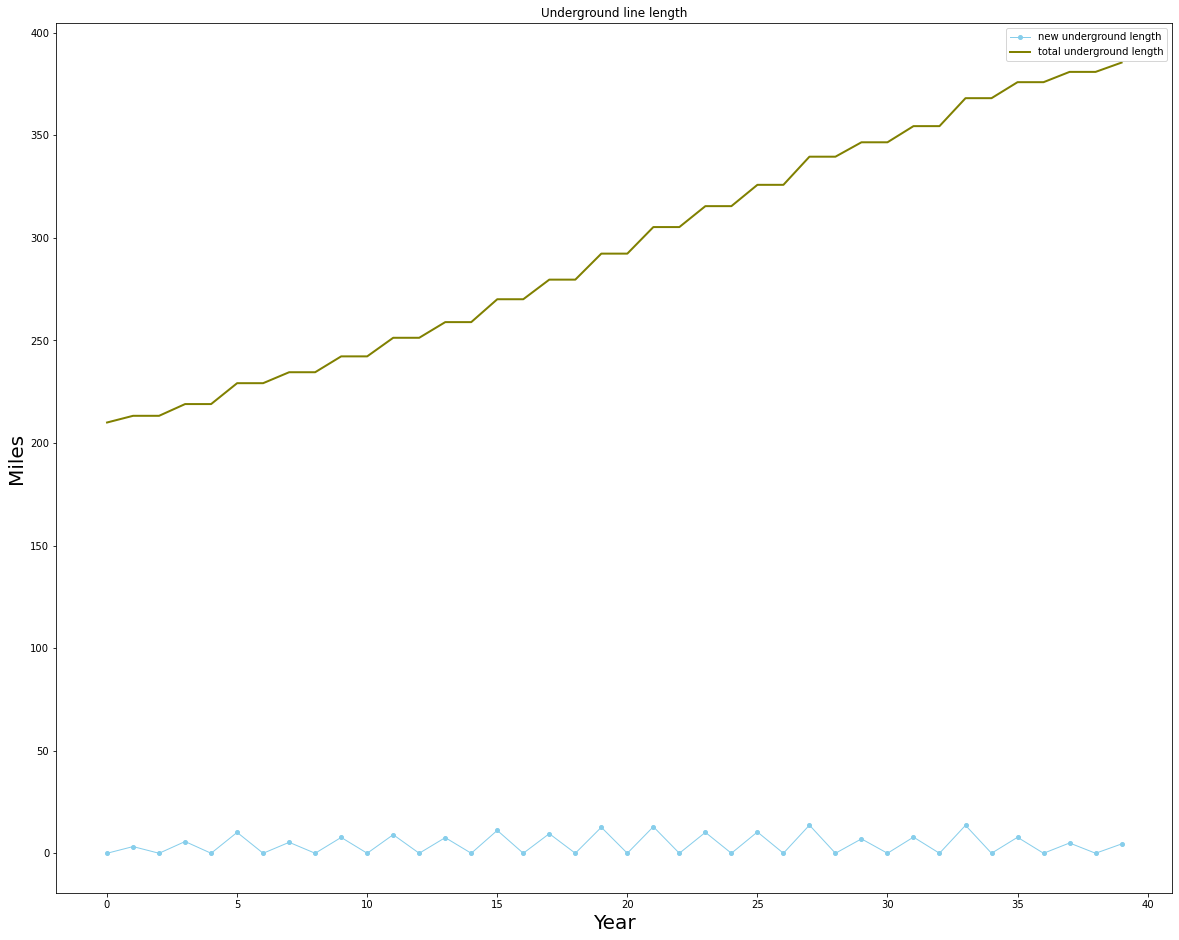

In [435]:
# multiple line plots
plt.plot( 'year', 'new underground length', data=df_cost_undergrounding, marker='o', markerfacecolor='skyblue', markersize=4, color='skyblue', linewidth=1)
plt.plot( 'year', 'total underground length', data=df_cost_undergrounding, marker='', color='olive', linewidth=2)
plt.ylabel('Miles', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Underground line length', loc ='center')
plt.legend()

# show legend
plt.legend()

# show graph
plt.show()

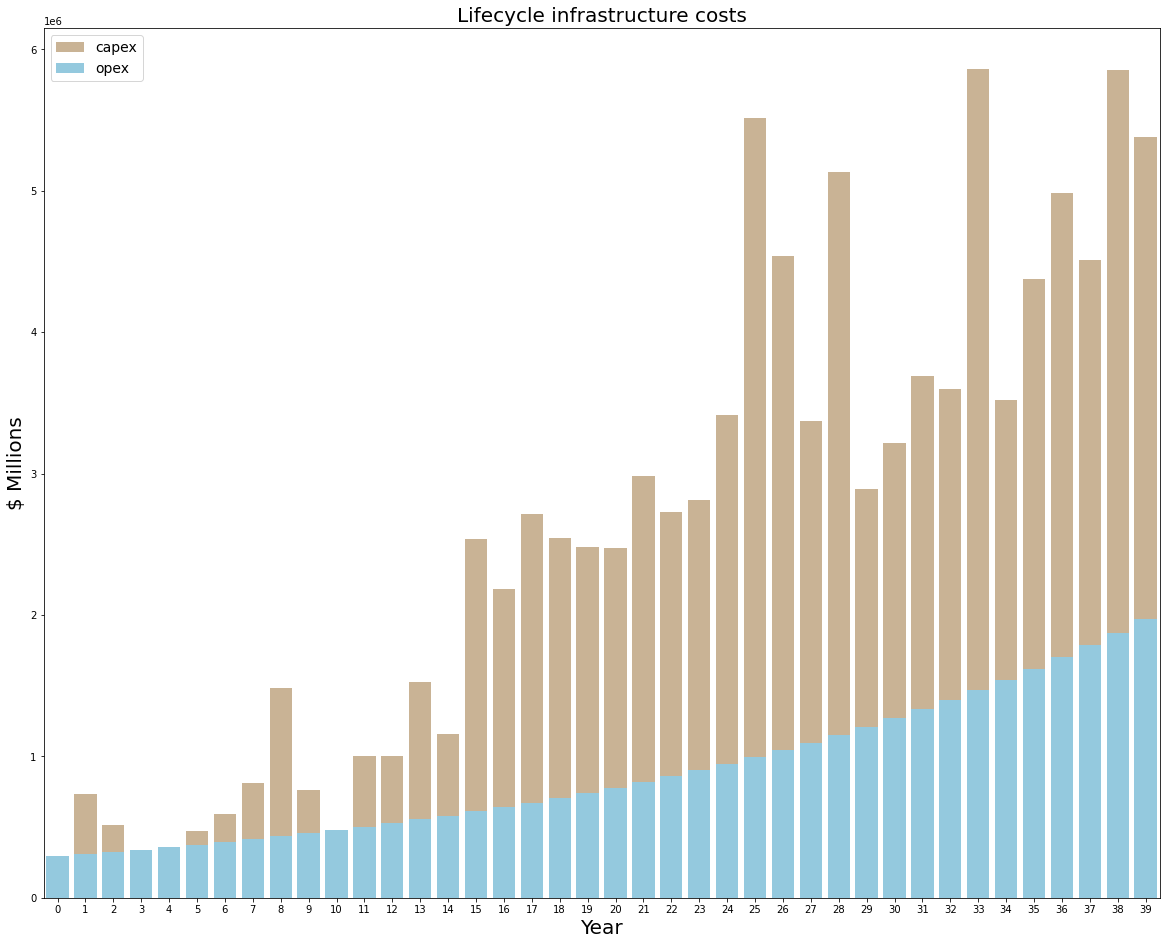

In [436]:
s_capex = sns.barplot(x='year', y='Lifecycle infrastructure cost', data = df_cost_undergrounding, color = 'tan', label="capex")
s_opex = sns.barplot(x ='year', y ='opex', data = df_cost_undergrounding, color = 'skyblue', label='opex')
plt.ylabel('$ Millions',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Lifecycle infrastructure costs', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)


In [437]:
# multiple line plots
#plt.plot( 'year', 'opex', data=df_cost_undergrounding, marker='o', markerfacecolor='olive', markersize=2, color='olive', linewidth=1)
#plt.plot( 'year', 'capex', data=df_cost_undergrounding, marker='', color='olive', linewidth=2)
#plt.plot( 'year', 'Lifecycle infrastructure cost', data=df_cost_undergrounding, marker='', color='skyblue', linewidth=2, linestyle='dashed', label="Lifecycle infrastructure cost")
#plt.xticks(np.arange(0, 40, 1))
# show legend
#plt.legend()

# show graph
#plt.show()

In [438]:
# define figure
#fig, ax = plt.subplots(1, figsize=(20, 10))
# numerical x
#x = np.arange(0,40)
# plot bars
#plt.bar(x -0.2, df_cost_undergrounding['opex'], width = 0.2, color = '#1D2F6F')
#plt.bar(x -0, df_cost_undergrounding['capex'], width = 0.2, color = '#8390FA')
#plt.bar(x +0.2, df_cost_undergrounding['Lifecycle infrastructure cost'], width = 0.2, color = '#FAC748')
# remove spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
# x y details
#plt.ylabel('$ Millions')
#plt.xticks(x, df_cost.index)
#plt.xlim(0, 40)
# grid lines
#ax.set_axisbelow(True)
#ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
#plt.title('Lifecycle infrastructure costs', loc ='center')
#plt.legend(['opex', 'capex', 'lifecycle infrastructure cost'], loc='upper left', ncol = 3)
#plt.show()

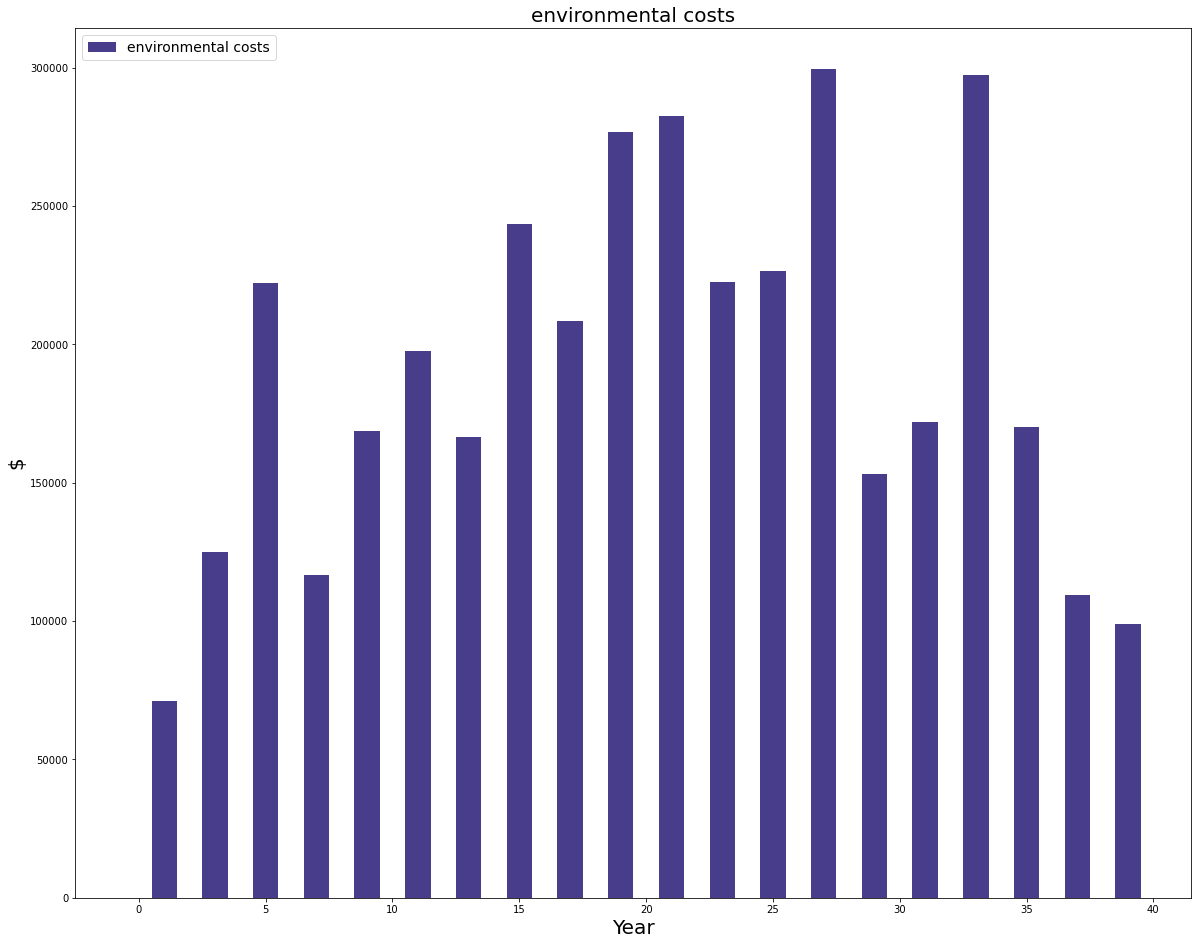

In [439]:
fig1=plt.bar(range(40),df_cost_undergrounding['environmental restoration cost'],align='center',width=1 ,color='darkslateblue',label='environmental costs')
plt.rcParams["figure.figsize"] = (20,16)
plt.xlabel('Year', fontsize=20)
plt.ylabel('$', fontsize=20)
#plt.xticks(x, df_cost_undergrounding.index)
plt.title('environmental costs', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)
plt.show(fig1)

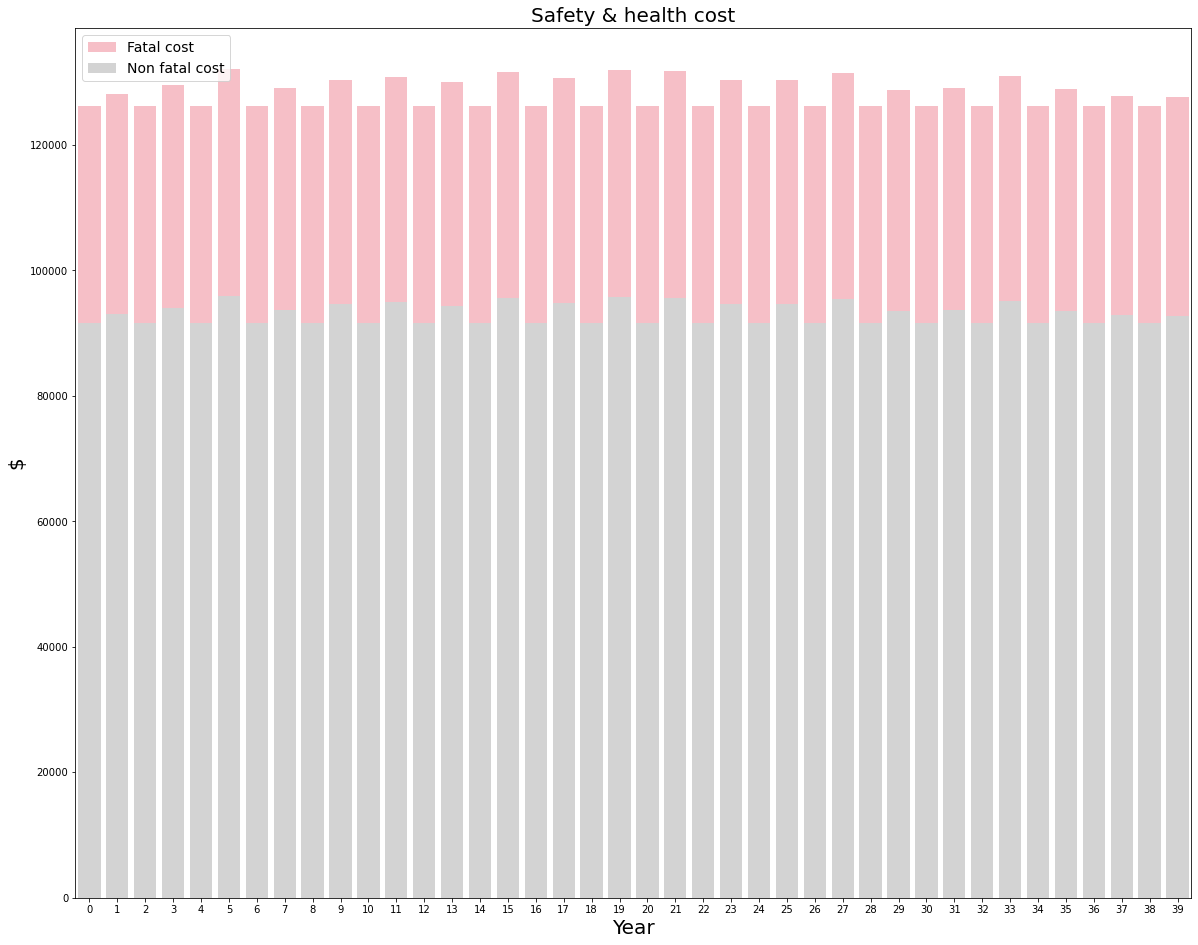

In [440]:
s_fatal_cost = sns.barplot(x='year', y='total safety cost', data = df_cost_undergrounding, color = 'lightpink', label="Fatal cost")
s_non_fatal_cost = sns.barplot(x ='year', y ='non fatal cost', data = df_cost_undergrounding, color = 'lightgray', label='Non fatal cost')
plt.ylabel('$', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Safety & health cost', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)

In [441]:
# define figure
#fig, ax = plt.subplots(1, figsize=(20, 10))
# numerical x
#x = np.arange(0,40)
# plot bars
#plt.bar(x -0.2, df_cost_undergrounding['non fatal cost'], width = 0.2, color = '#1D2F6F')
#plt.bar(x -0, df_cost_undergrounding['fatal cost'], width = 0.2, color = '#8390FA')
#plt.bar(x +0.2, df_cost_undergrounding['total safety cost'], width = 0.2, color = '#FAC748')
# remove spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
# x y details
#plt.ylabel('$')
#plt.xticks(x, df_cost.index)
#plt.xlim(0, 40)
# grid lines
#ax.set_axisbelow(True)
#ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
#plt.title('Safety and health costs', loc ='center')
#plt.legend(['non fatal cost', 'fatal cost', 'safety and health cost'], loc='upper left', ncol = 3)
#plt.show()

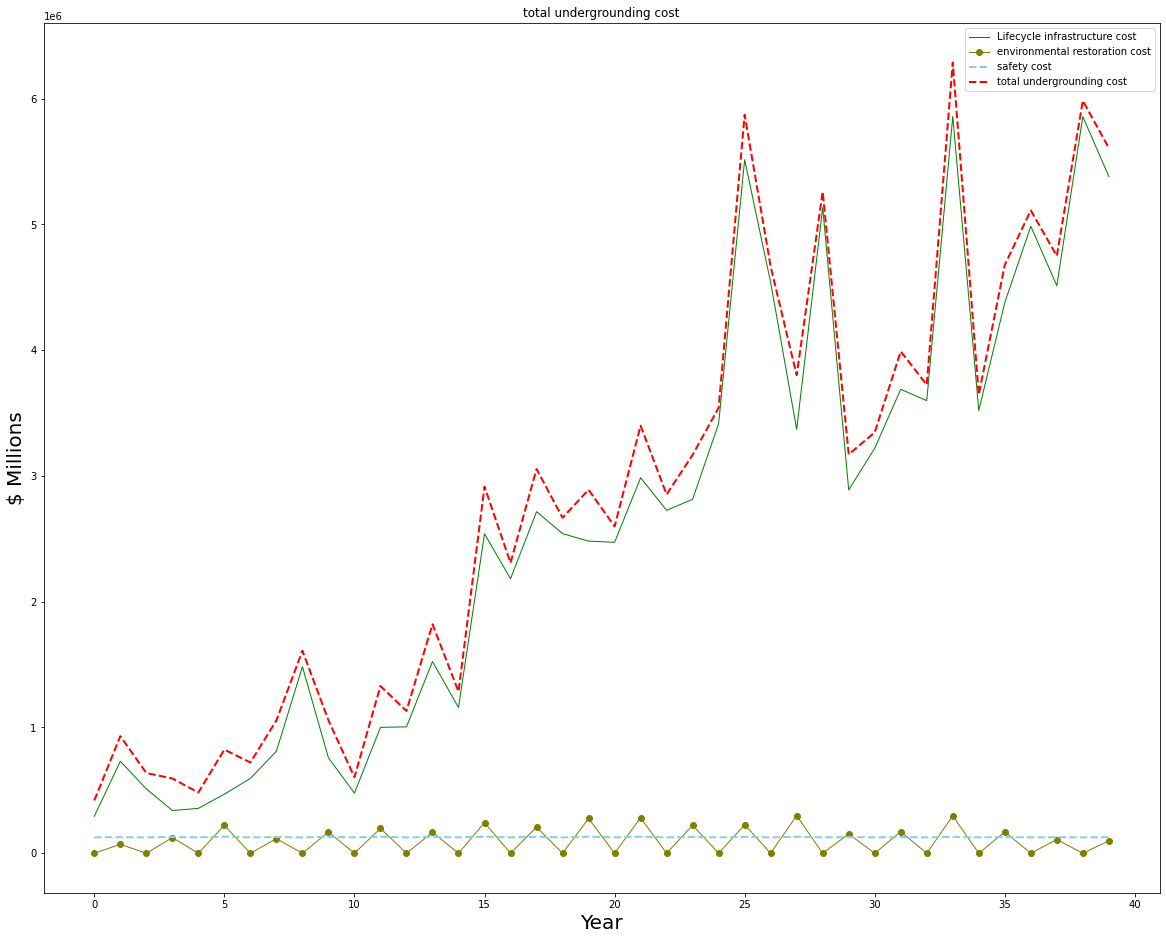

In [442]:
# multiple line plots
plt.plot( 'year', 'Lifecycle infrastructure cost', data=df_cost_undergrounding, marker='', markerfacecolor='green', markersize=4, color='green', linewidth=1)
plt.plot( 'year', 'environmental restoration cost', data=df_cost_undergrounding, marker='o', color='olive', linewidth=1)
plt.plot( 'year', 'total safety cost', data=df_cost_undergrounding, marker='', color='skyblue', linewidth=2, linestyle='dashed', label="safety cost")
plt.plot( 'year', 'total undergrounding cost', data=df_cost_undergrounding, marker='', color='red', linewidth=2, linestyle='dashed', label="total undergrounding cost")
plt.ylabel('$ Millions', fontsize=20)
plt.xlabel('Year', fontsize=20)
#plt.xticks(x, df_cost.index)
plt.title('total undergrounding cost', loc='center')
# show legend
plt.legend()

# show graph
plt.show()

In [443]:
###Sensitivity analysis
#circuit_list_new=[]
#overhead_line={'lifespan':70}
overhead_line={'lifespan':70,'replcost':124000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':60}
capex_sa_ls_max=[0 for t in range (40)]
opex_sa_ls_max=[0 for t in range (40)]
underground_length_new_sa_ls_max=[0 for t in range (40)]
underground_length_total_sa_ls_max=[0 for t in range (40)]
environmental_restoration_cost_sa_ls_max=[0 for t in range (40)]
underground_rate_sa_ls_max=[]
for i in range (segment_number):
    #circuit=Line_segment_undergrounding_after_lifespan(age_shape, age_scale, length_shape, length_scale, 0.66)
    #circuit_list_new.append(circuit)
    underground_length_total_sa_ls_max[0]+=circuit_list_new[i].underground[0]
#print(circuit_list)
for t in range (40):
    for i in range (len(circuit_list)):
        circuit_list_new[i].add_age()
        circuit_list_new[i].add_replcost_intrest_rate()
        circuit_list_new[i].capex_calculation()
        circuit_list_new[i].opex_calculation()
        circuit_list_new[i].opex_add_interest_rate()
        circuit_list_new[i].underground_length_new_array()
        underground_length_total_sa_ls_max[t]+=circuit_list_new[i].underground_length_new[t]
        circuit_list_new[i].environmental_restoration_calculation()
        capex_sa_ls_max[t]+=circuit_list_new[i].capex[t]
        opex_sa_ls_max[t]+=circuit_list_new[i].opex[t]
        underground_length_new_sa_ls_max[t]+=circuit_list_new[i].underground_length_new[t]
        environmental_restoration_cost_sa_ls_max[t]+=circuit_list_new[i].environmental_restoration[t]
    underground_length_total_sa_ls_max[t]+=underground_length_total_sa_ls_max[t-1]
    if underground_length_total_sa_ls_max[t-1]==0:
        underground_rate_sa_ls_max.append(1)
    else:
        underground_rate_sa_ls_max.append(underground_length_total[t]/underground_length_total[t-1])
#print(underground_length_new)
#print(underground_length_total)
#Determining future total new underground line mileage
#print(underground_rate)
#Determining rate change in underground, needed to calculate safety and health costs
#print(capex)
#print(opex)
Lifecycle_infrastructure_cost_sa_ls_max=[0 for t in range (40)]
for t in range (40):
    Lifecycle_infrastructure_cost_sa_ls_max[t]=Lifecycle_infrastructure_cost_sa_ls_max[t]+capex_sa_ls_max[t]+opex_sa_ls_max[t]
#print(Lifecycle_infrastructure_cost)
#print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines
non_fatal_cost_sa_ls_max=[0 for t in range (40)]
fatal_cost_sa_ls_max=[0 for t in range (40)]
total_safety_cost_sa_ls_max=[0 for t in range (40)]
for t in range (40):
    non_fatal_cost_sa_ls_max[t]+=underground_rate_sa_ls_max[t]*circuit_list_new[0].non_fatal_cost()
    fatal_cost_sa_ls_max[t]+=underground_rate_sa_ls_max[t]*circuit_list_new[0].fatal_cost()
    total_safety_cost_sa_ls_max[t]=non_fatal_cost_sa_ls_max[t]+fatal_cost_sa_ls_max[t]
#print(non_fatal_cost)
#print(fatal_cost)
#print(total_safety_cost)
total_undergrounding_cost_sa_ls_max=[0 for t in range (40)]
for t in range (40):
    total_undergrounding_cost[t]+=Lifecycle_infrastructure_cost[t]+environmental_restoration_cost[t]+total_safety_cost[t]
#print(total_undergrounding_cost)
df_cost_undergrounding_sa_ls_min=pd.DataFrame([range(40),underground_length_new_sa_ls_max, underground_length_total_sa_ls_max,capex_sa_ls_max,opex_sa_ls_max,Lifecycle_infrastructure_cost_sa_ls_max,environmental_restoration_cost_sa_ls_max,non_fatal_cost_sa_ls_max,fatal_cost_sa_ls_max,total_safety_cost_sa_ls_max,total_undergrounding_cost_sa_ls_max]).transpose()
df_cost_undergrounding_sa_ls_min.columns=['year','new underground length','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
df_cost_undergrounding_sa_ls_min['year'] =df_cost_undergrounding['year'].astype(int)

In [444]:
df_cost_undergrounding_sa_ls_min['total undergrounding cost'].sum() 

0.0

In [445]:
#import pandas as pd
#df_capex=pd.DataFrame(capex_dataframe)
#df_opex=pd.DataFrame(opex_dataframe)
#df_Lifecycle_infrastructure_cost=pd.DataFrame(Lifecycle_infrastructure_cost_dataframe)
#capex_dataframe=capex
#opex_dataframe=opex
#Lifecycle_infrastructure_cost_dataframe=Lifecycle_infrastructure_cost

In [446]:
#df_capex
#df_opex
#df_Lifecycle_infrastructure_cost
#df1=pd.DataFrame.merge(right=df_capex,how='inner', on='df_capex',left_on=df_opex,right_on=df_Lifecycle_infrastructure_cost)

In [458]:
###Testing the results
for i in range (segment_number):
    circuit_i=Line_segment_undergrounding_after_lifespan(age_shape, age_scale, length_shape, length_scale, 0.66)
    print(circuit_i.get_underground_baseyear())
    print(circuit_i.get_age_baseyear())
    print(circuit_i.get_length())
    print(circuit_i.get_first_retire())
    for t in range (40):
        circuit_i.add_age()
        circuit_i.add_replcost_intrest_rate()
        circuit_i.capex_calculation()
        circuit_i.opex_calculation()
        circuit_i.underground_length_new_array()
    print(circuit_i.get_underground_array())
    print(circuit_i.get_age_array())
    print(circuit_i.underground_length_new)
    print(circuit_i.replcost_rate)
    print(circuit_i.capex)
    print(circuit_i.opex)
#For each of circuits, 1st number shows its underground status in the baseyear
#2nd number shows its age in the baseyear
#3rd number shows its length 
#4th array shows its underground status in different years
#5th array shows its age in different years
#6th array shows its raplacement_rate in different years (it is just a potential rate using to calculate real numbers in next array)
#7th array shows its raplacement cost in different years
#7th array shows its operation and maitenance cost in different years

0
27.569687232677193
0.23477053098378184
43.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27.569687232677193, 28.569687232677193, 29.569687232677193, 30.569687232677193, 31.569687232677193, 32.5696872326772, 33.5696872326772, 34.5696872326772, 35.5696872326772, 36.5696872326772, 37.5696872326772, 38.5696872326772, 39.5696872326772, 40.5696872326772, 41.5696872326772, 42.5696872326772, 43.5696872326772, 44.5696872326772, 45.5696872326772, 46.5696872326772, 47.5696872326772, 48.5696872326772, 49.5696872326772, 50.5696872326772, 51.5696872326772, 52.5696872326772, 53.5696872326772, 54.5696872326772, 55.5696872326772, 56.5696872326772, 57.5696872326772, 58.5696872326772, 59.5696872326772, 60.5696872326772, 61.5696872326772, 62.5696872326772, 63.5696872326772, 64.5696872326772, 65.5696872326772, 66.5696872326772, 67.5696872326772]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.23477053098378184, 0, 0, 0, 0, 0,

[124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[65.50259602025211]
0
14.286219271455199
0.867815837031221
56.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[14.286219271455199, 15.286219271455199, 16.2862192714552, 17.2862192714552, 18.2862192714552, 19.2862192714552, 20.2862192714552, 21.2862192714552, 22.2862192714552, 23.2862192714552, 24.2862192714552, 25.2862192714552, 26.2862192714552, 27.2862192714552, 28.2862192714552, 29.2862192714552, 30.2862192714552, 31.2862192714552, 32.286219271455195, 33.2862192

[0, 0, 0, 0, 0, 0.8035628493983868, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 357000, 357000, 357000]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 286871.9372352241, 0, 0]
[498.2089666269999]
0
22.078740500175574
1.307631444791602
48.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22.078740500175574, 23.078740500175574, 24.078740500175574, 25.078740500175574, 26.078740500175574, 27.078740500175574, 28.078740500175574, 29.078740500175574, 30.078740500175574, 31.078740500175574, 3

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000, 124000]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[284.31460279295703]
0
33.22510122545527
0.8861078241258357
37.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
[33.22510122545527, 34.22510122545527, 35.22510122545527, 36.22510122545527, 37.22510122545527, 38.22510122545527, 39.22510122545527, 40.22510122545527, 41.22510122545527, 42.22510122545527, 43.22510122545527, 44.22510122545527, 45.22

In [448]:
###Testing the results
#for i in range (segment_number):
    #circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    #for t in range (200):
        #circuit_i.add_age()
    #A=circuit_i.get_underground_array().copy()
    #print(A)
    #print(circuit_i.get_age_array())

In [449]:
###This class was just generated at first to do the calculation based on the formulas in larsen paper and then class segment was developed with a more dynamic approach. 
class Circuit2:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify length, age and overhead or underground, which are three atributes of a circuit.
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif underground==1:
            lifespan_x= int(underground_line['lifespan'])
        #age_i_baseyear= self.age[0] #self.get_age_baseyear()
        #age_i_t=0
        #age_i_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age=(self.age[-1])
            if age<(lifespan_x-1):
                age+=1
                self.age.append(age)
                self.underground.append(self.underground[-1])
            else:
                self.age.append(1)
                self.underground.append(1)
                #age_i_t=(age_i_baseyear)+(t-baseyear)
        return(self.age)    
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        length=self.length
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (sum(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        underground= self.underground[-1]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        opex_x_t=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            #else:
                #None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        capex_StatusQuo_i=self.get_capex_StatusQuo_i()
        opex_StatusQuo_i=self.get_opex_StatusQuo_i()
        lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
        lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear_i=self.age[0]
        underground= self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        #underground= self.underground[0]
        #if underground==0:
            #underground==1
        length_i=self.get_length_baseyear()
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i+=(capex_i)
        return (capex_underground_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        underground=self.underground[-1]
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            if  underground==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    underground==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        capex_underground_i=self.get_capex_underground_i()
        opex_underground_i=self.get_opex_underground_i()
        lifecyclecost_i= capex_underground_i+opex_underground_i
        lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_length_baseyear()
        underground_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t>= first_retire_i:
                underground_t=length_i
                underground_t_array.append(underground_t)     
            else:
                if self.underground[0]==0:
                    underground_t=0
                    underground_t_array.append(underground_t)
                    
                else:
                    underground_t=length_i
                    underground_t_array.append(underground_t)
        return(underground_t_array)
    #Determining future annual underground line mileage
    #def lifecycle_net(self):
        #lifecyclecost_underground=self.get_lifecyclecost_underground()
        #lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        #lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #The additional lifecycle costs due to undergrounding is calculated at the end of simulation considering all circuits.                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            for i in range (segment_number):
                sum_lengh_i_t=0
                length_i_t= self.get_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [450]:
circuit_i=Circuit2(age_shape, age_scale, length_shape, length_scale, 0.66)
circuit_underground=circuit_i.get_underground()
print(circuit_underground)
circuit_age_baseyear=circuit_i.get_age_baseyear
print(circuit_age_baseyear)
circuit_length_baseyear=circuit_i.get_length_baseyear
print(circuit_length_baseyear)
circuit_age_baseyear=circuit_i.get_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing overhead or underground status, age in base year and age in year t for a circuite using class methods

[0]
<bound method Circuit2.get_age_baseyear of <__main__.Circuit2 object at 0x000002381073D760>>
<bound method Circuit2.get_length_baseyear of <__main__.Circuit2 object at 0x000002381073D760>>
[22.873181512131442]
[22.873181512131442, 23.873181512131442, 24.873181512131442, 25.873181512131442, 26.873181512131442, 27.873181512131442, 28.873181512131442, 29.873181512131442, 30.873181512131442, 31.873181512131442, 32.87318151213144, 33.87318151213144, 34.87318151213144, 35.87318151213144, 36.87318151213144, 37.87318151213144, 38.87318151213144, 39.87318151213144, 40.87318151213144, 41.87318151213144, 42.87318151213144, 43.87318151213144, 44.87318151213144, 45.87318151213144, 46.87318151213144, 47.87318151213144, 48.87318151213144, 49.87318151213144, 50.87318151213144, 51.87318151213144, 52.87318151213144, 53.87318151213144, 54.87318151213144, 55.87318151213144, 56.87318151213144, 57.87318151213144, 58.87318151213144, 59.87318151213144, 60.87318151213144, 61.87318151213144, 62.873181512131

In [451]:
for i in range (segment_number):
    circuit_i=Circuit2(age_shape, age_scale, length_shape, length_scale, random.uniform(0,1))
    circuit_underground=circuit_i.get_underground()
    #print(circuit_underground)
    circuit_age_baseyear=circuit_i.get_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing underground status, age in base year and age in year t for a circuite using class methods

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [15.922725431539089, 16.92272543153909, 17.92272543153909, 18.92272543153909, 19.92272543153909, 20.92272543153909, 21.92272543153909, 22.92272543153909, 23.92272543153909, 24.92272543153909, 25.92272543153909, 26.92272543153909, 27.92272543153909, 28.92272543153909, 29.92272543153909, 30.92272543153909, 31.92272543153909, 32.92272543153909, 33.92272543153909, 34.92272543153909, 35.92272543153909, 36.92272543153909, 37.92272543153909, 38.92272543153909, 39.92272543153909, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [18.970219162326007, 19.970219162326007, 20.970219162326007, 21.970219162326007, 22.970219162326007, 23.970219162326007, 24.970219162326007, 25.970219162326007, 26.970219162326007, 27.970219162326007, 28.970219162326007, 29.970219162326007, 30.970219162326007, 31.970219162326007, 32.970219162326, 33.970219162326, 34.970219162326, 35.970219162326, 36.970219162326, 37.970219162326, 38.970219162326, 39.970219162326, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] & Segment age 

x= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [22.851513778816564, 23.851513778816564, 24.851513778816564, 25.851513778816564, 26.851513778816564, 27.851513778816564, 28.851513778816564, 29.851513778816564, 30.851513778816564, 31.851513778816564, 32.85151377881657, 33.85151377881657, 34.85151377881657, 35.85151377881657, 36.85151377881657, 37.85151377881657, 38.85151377881657, 39.85151377881657, 40.85151377881657, 41.85151377881657, 42.85151377881657, 43.85151377881657, 44.85151377881657, 45.85151377881657, 46.85151377881657, 47.85151377881657, 48.85151377881657, 49.85151377881657, 50.85151377881657, 51.85151377881657, 52.85151377881657, 53.85151377881657, 54.85151377881657, 55.85151377881657, 56.85151377881657, 57.85151377881657

In [452]:
circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.

[357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000]
32738.85532370413
[3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 1785.0, 3570.0, 3570

In [453]:
circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(lifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, lifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.

2077.48557640324
206.83322755148816
14978.9698067864
15574.449340946732
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344, 0.38157655071690344]


In [454]:
underground_array=[]
for i in range (segment_number):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    underground_i=max(circuit_i.underground_t())
    underground_array.append(underground_i)
print(sum(underground_array))
print(underground_array)
#Identifying total number of underground lines at the end of study duration.

317.9280469114112
[0.33461173044525555, 0.32730357179861475, 0.059180917306046736, 0.17126416431830055, 0.29197998112290596, 0.2876653552242442, 0.7082713189474572, 0.043128864045771036, 0.19271261322336597, 0.4079911399101403, 0.29581240740108034, 0.9177395118817283, 0.6853930695488054, 0.1751826402650138, 0.4522438326801367, 0.228429073579892, 0.2347602101383047, 0.7282273051379562, 0.9871809988572043, 0.2195281233273412, 0.21971013897304545, 0.46939610459424547, 0.38941408123739796, 0.7229272798591874, 0.40782854333828633, 0.08193388452991256, 0.3309496856270214, 0.3992120511222306, 0.5192253092509612, 0.7911996530619677, 0.37280927318710044, 0.15993763122558358, 0.5624237712955183, 0.024094801426665088, 0.4642840974205373, 0.40969095942866246, 0.7975482003809927, 1.9661955773111839, 0.12156259370301936, 0.39486539992403447, 0.3479998623285659, 0.7954099146204769, 0.365154388786181, 0.29740101856679996, 0.7934931082603152, 0.2651925851873136, 0.3143188133598972, 0.5372094181082719, 

In [455]:
total_lifecycle_statusQuo=[]
for i in range (segment_number):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    total_lifecycle_statusQuo.append(circuit_i.get_lifecyclecost_StatusQuo())
sum(total_lifecycle_statusQuo)
#Calculating lifecycle costs for statusQuo strategy, in which each line will be replaced with the same type after finishing its lifespan (overhead with overhead and underground with underground)

21962583.060817532

In [456]:
total_lifecycle_underground=[]
for i in range (segment_number):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    total_lifecycle_underground.append(circuit_i.get_lifecyclecost_underground())
sum(total_lifecycle_underground)
#Calculating lifecycle costs for undergrounding strategy, in which each line will be replaced with an underground line after finishing its lifespan.

22018333.881022856

In [457]:
additional_cost=sum(total_lifecycle_underground)-sum(total_lifecycle_statusQuo)
print(additional_cost)
#Calculating additional lifecycle costs for undergrounding strategy(lifecycle costs of undergrounding strategy-lifecycle costs of statusQuo strategy

55750.8202053234
